In [1]:
import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import pandas as pd

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 1475504 bytes


In [8]:
import io

df = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [9]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Popularity', 'Number of Doors'], axis=1)
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


In [11]:
df.isnull().values.any()

True

In [12]:
df.shape
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           11914 non-null  object 
 1   Model          11914 non-null  object 
 2   Year           11914 non-null  int64  
 3   HP             11845 non-null  float64
 4   Cylinders      11884 non-null  float64
 5   Transmission   11914 non-null  object 
 6   Drive Mode     11914 non-null  object 
 7   Vehicle Size   11914 non-null  object 
 8   Vehicle Style  11914 non-null  object 
 9   MPG-H          11914 non-null  int64  
 10  MPG-C          11914 non-null  int64  
 11  Price          11914 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


In [13]:
df.describe()

,Year,HP,Cylinders,MPG-H,MPG-C,Price
count,11914.000000,11845.00000,11884.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,26.637485,19.733255,4.059474e+04
std,7.579740,109.19187,1.780559,8.863001,8.987798,6.010910e+04
min,1990.000000,55.00000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,354.000000,137.000000,2.065902e+06


In [14]:
df.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Price             0
dtype: int64

In [15]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (792, 12)


In [17]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500


In [18]:
df.isnull().sum()


Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Price             0
dtype: int64

In [19]:
index = df.isnull().sum()>0
print("The feature which contain missing values are\n",[df.columns[index][i] for i in range(sum(index))])

The feature which contain missing values are
 ['HP', 'Cylinders']


In [20]:
df = df.dropna()  
print(df.isnull().sum())   

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


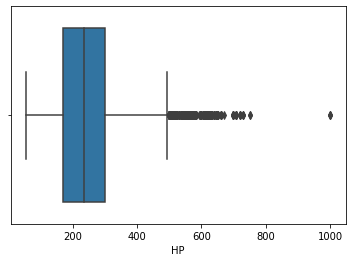

In [21]:
sns.boxplot(x=df['HP'])


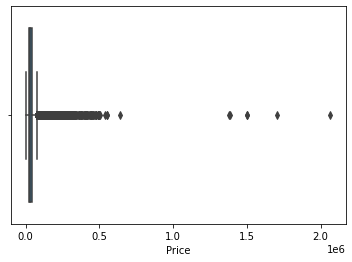

In [22]:
sns.boxplot(x=df['Price'])

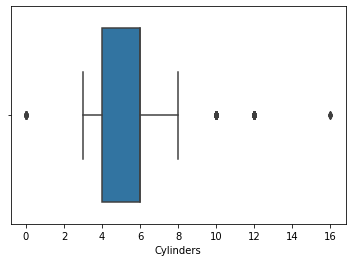

In [23]:
sns.boxplot(x=df['Cylinders'])

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.00
HP             131.00
Cylinders        2.00
MPG-H            8.00
MPG-C            6.00
Price        21426.25
dtype: float64


In [25]:
import plotly.graph_objects as go
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

popular_labels = counts.index[:5]


colors = ['lightslategray',] * len(popular_labels)
colors[0] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=counts[:5],
    y=popular_labels,
    marker_color=colors, 
    orientation='h'
)])

fig.update_layout(title_text='Proportion of Car brands in America (in %)',
                  xaxis_title="Percentage",
                  yaxis_title="Car Brand")

In [26]:

index = df.groupby(['Year']).mean()['Price'].index.tolist()
mean_prices = df.groupby(['Year']).mean()['Price'].values.tolist()
std_prices = df.groupby(['Year']).std()['Price'].values.tolist()


price_per_year = pd.DataFrame(np.column_stack((mean_prices, std_prices)), columns=['Mean', 'Std'], index=index)


fig = go.Figure()

fig.add_trace(go.Scatter(x=index, y=price_per_year.Mean,
                    mode='markers',
                    name='Mean Price'))

fig.add_trace(go.Scatter(x=index, y=price_per_year.Std,
                    mode='markers',
                    name='Std Price'))

fig.update_layout(title="Average MSRP per Year",
                  xaxis_title="Year",
                  yaxis_title="MSRP")

fig.show()

In [27]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.334048,-0.032824,0.272320,0.225231,0.209394
HP,0.334048,1.000000,0.786647,-0.418886,-0.471283,0.661622
Cylinders,-0.032824,0.786647,1.000000,-0.611245,-0.631976,0.554951
MPG-H,0.272320,-0.418886,-0.611245,1.000000,0.841924,-0.208408
MPG-C,0.225231,-0.471283,-0.631976,0.841924,1.000000,-0.233076
Price,0.209394,0.661622,0.554951,-0.208408,-0.233076,1.000000


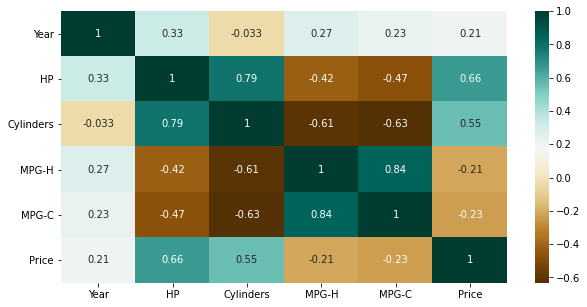

In [28]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True )

In [33]:
%matplotlib inline   
plt.rcParams["figure.figsize"] = (10,6)  

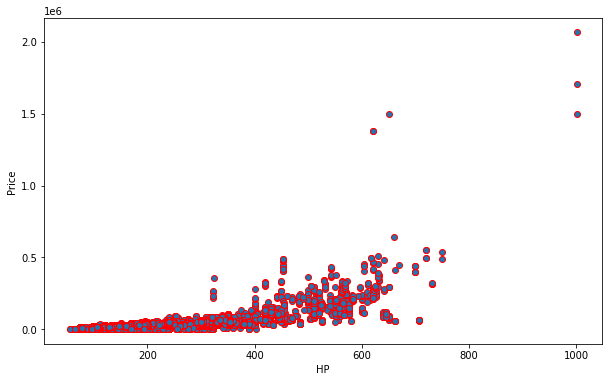

In [37]:

fig, abe= plt.subplots(figsize=(10,6))
abe.scatter(df['HP'], df['Price'], edgecolors='r')
abe.set_xlabel('HP')
abe.set_ylabel('Price')

plt.show()

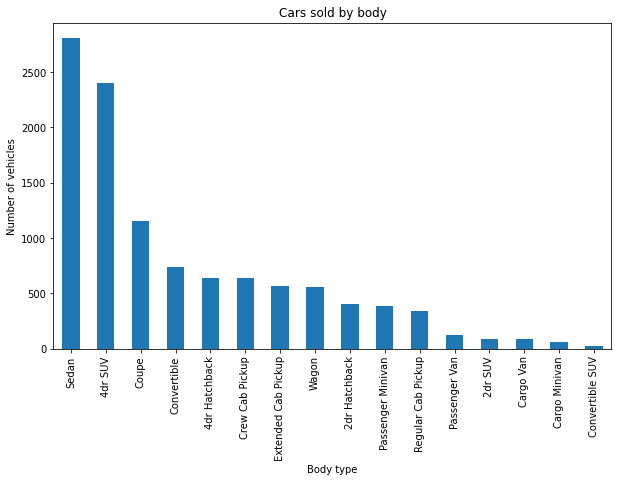

In [38]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))                     
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Body type');

In [40]:
df['price_group'] = pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
df['price_group'] = df['price_group'].astype(object)



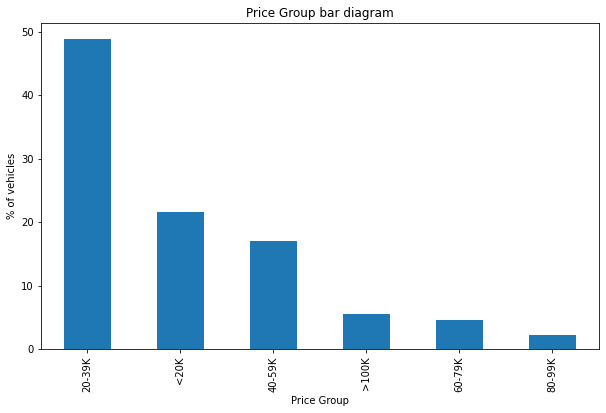

In [41]:
(df['price_group'].value_counts() / len(df) *100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

# **Ml** **Model** **Start**

In [43]:
X = df[[ 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

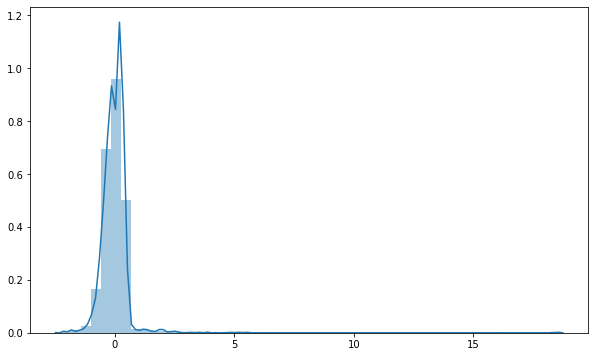

In [48]:
y_pred = regressor.predict(X_test)
sns.distplot((y_test-y_pred),bins=50)

In [50]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.3381886708083147
Root Mean Squared Error: 0.6306951841115818
R Score: 0.4923687504693327


In [51]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

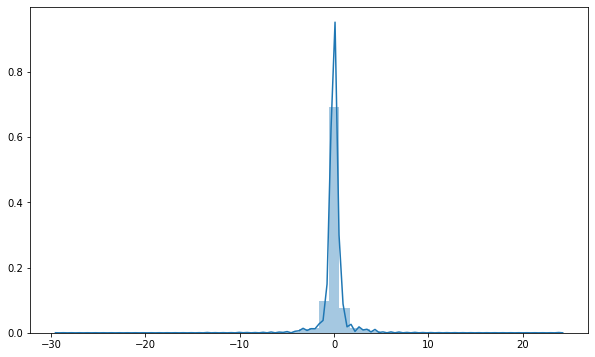

In [52]:
y_pred = regressor.predict(X_test)
sns.distplot((y_test-y_pred),bins=50)

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.07877000647451628
Root Mean Squared Error: 0.29333406574817295
R Score: 0.8901919136136676
